### will be using the K-nearest neighbors algorithm to predict how many points NBA players scored in the 2013-2014 season.


In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('nba_2013.csv')
data.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [3]:
# Cheak any null values 

data.isna().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

In [4]:
data.dtypes

player           object
pos              object
age               int64
bref_team_id     object
g                 int64
gs                int64
mp                int64
fg                int64
fga               int64
fg.             float64
x3p               int64
x3pa              int64
x3p.            float64
x2p               int64
x2pa              int64
x2p.            float64
efg.            float64
ft                int64
fta               int64
ft.             float64
orb               int64
drb               int64
trb               int64
ast               int64
stl               int64
blk               int64
tov               int64
pf                int64
pts               int64
season           object
season_end        int64
dtype: object

In [5]:
#  x3p. , fg. , x2p. , efg., ft. are float data type

data['x3p.'].fillna(data['x3p.'].mean() , inplace=True)
data['fg.'].fillna(data['fg.'].mean() , inplace=True)
data['x2p.'].fillna(data['x2p.'].mean() , inplace=True)
data['efg.'].fillna(data['efg.'].mean() , inplace=True)
data['ft.'].fillna(data['ft.'].mean() , inplace=True)

In [6]:
data.isna().sum()

player          0
pos             0
age             0
bref_team_id    0
g               0
gs              0
mp              0
fg              0
fga             0
fg.             0
x3p             0
x3pa            0
x3p.            0
x2p             0
x2pa            0
x2p.            0
efg.            0
ft              0
fta             0
ft.             0
orb             0
drb             0
trb             0
ast             0
stl             0
blk             0
tov             0
pf              0
pts             0
season          0
season_end      0
dtype: int64

#### Select only the numeric columns from the dataset¶

In [7]:
data_num = data[[i for i in data.columns if data[i].dtype == 'int64' or data[i].dtype == 'float64' ]].iloc[:,:-1]

data_cat = data[[i for i in data.columns if data[i].dtype == 'object']]

In [8]:
data_num.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,23,63,0,847,66,141,0.468,4,15,0.266667,...,0.660,72,144,216,28,23,26,30,122,171
1,20,81,20,1197,93,185,0.503,0,0,0.285111,...,0.581,142,190,332,43,40,57,71,203,265
2,27,53,12,961,143,275,0.520,0,0,0.285111,...,0.639,102,204,306,38,24,36,39,108,362
3,28,73,73,2552,464,1011,0.459,128,300,0.426667,...,0.815,32,230,262,248,35,3,146,136,1330
4,25,56,30,951,136,249,0.546,0,1,0.000000,...,0.836,94,183,277,40,23,46,63,187,328


#### Normalize all numeric columns¶

In [9]:
from sklearn.preprocessing import MinMaxScaler

Scaler = MinMaxScaler()
scaled_data = Scaler.fit_transform(data_num)
scaled_data = pd.DataFrame(scaled_data , columns=data_num.columns)

In [10]:
scaled_data.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,0.20,0.756098,0.000000,0.271067,0.077739,0.083531,0.468,0.015326,0.024390,0.266667,...,0.660,0.163636,0.183908,0.193896,0.038835,0.120419,0.118721,0.101695,0.446886,0.065947
1,0.05,0.975610,0.243902,0.383211,0.109541,0.109597,0.503,0.000000,0.000000,0.285111,...,0.581,0.322727,0.242656,0.298025,0.059639,0.209424,0.260274,0.240678,0.743590,0.102198
2,0.40,0.634146,0.146341,0.307594,0.168433,0.162915,0.520,0.000000,0.000000,0.285111,...,0.639,0.231818,0.260536,0.274686,0.052705,0.125654,0.164384,0.132203,0.395604,0.139607
3,0.45,0.878049,0.890244,0.817366,0.546525,0.598934,0.459,0.490421,0.487805,0.426667,...,0.815,0.072727,0.293742,0.235189,0.343967,0.183246,0.013699,0.494915,0.498168,0.512919
4,0.30,0.670732,0.365854,0.304390,0.160188,0.147512,0.546,0.000000,0.001626,0.000000,...,0.836,0.213636,0.233716,0.248654,0.055479,0.120419,0.210046,0.213559,0.684982,0.126494


In [11]:
# Now divide scaled data in to input and target OR independent and dependent

scaled_data_x = scaled_data.drop('pts' , axis=1)

scaled_data_y = scaled_data.pts

In [12]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(scaled_data_x , scaled_data_y , test_size = 0.3 , random_state=0)

In [13]:
x_train.shape ,y_train.shape, x_test.shape , y_test.shape

((336, 25), (336,), (145, 25), (145,))

#### Create the knn model. We will use regressor because we are predicting on continous values

In [14]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

for k in range(10):
    k_value = k+1
    knn = KNeighborsRegressor(n_neighbors=k_value)
    knn.fit(x_train , y_train)
    y_pred = knn.predict(x_test)
    print ("Regression score is:",format(r2_score(y_test, y_pred),'.4f'), "for k_value:", k_value)

Regression score is: 0.9145 for k_value: 1
Regression score is: 0.9464 for k_value: 2
Regression score is: 0.9548 for k_value: 3
Regression score is: 0.9594 for k_value: 4
Regression score is: 0.9583 for k_value: 5
Regression score is: 0.9579 for k_value: 6
Regression score is: 0.9579 for k_value: 7
Regression score is: 0.9609 for k_value: 8
Regression score is: 0.9576 for k_value: 9
Regression score is: 0.9557 for k_value: 10


#### K=8, as it gives us the highest prediction score.

In [15]:
knn = KNeighborsRegressor(n_neighbors=8)
knn.fit(x_train , y_train)
y_pred = knn.predict(x_test)

print ("Regression score is:", format(r2_score(y_test, y_pred),'.4f'))

Regression score is: 0.9609


### ------------------------------------------------------------------------------------------------------------------------------------------------

### In this assignment find the frequency of words in a webpage. User can use urllib and BeautifulSoup to extract text from webpage.

In [16]:
from bs4 import BeautifulSoup
import urllib.request
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91866\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
response = urllib.request.urlopen('http://php.net/')
html = response.read()
soup = BeautifulSoup(html,"html5lib")
text = soup.get_text(strip=True) 
tokens = [t for t in text.split()] 
clean_tokens = tokens[:] 
sr = stopwords.words('english') 
for token in tokens: 
    if token in stopwords.words('english'): 
        clean_tokens.remove(token) 
freq = nltk.FreqDist(clean_tokens) 
for key,val in freq.items(): 
    print (str(key) + ':' + str(val))

PHP::1
Hypertext:1
PreprocessorDownloadsDocumentationGet:1
InvolvedHelpGetting:1
StartedIntroductionA:1
simple:1
tutorialLanguage:1
ReferenceBasic:1
syntaxTypesVariablesConstantsExpressionsOperatorsControl:1
StructuresFunctionsClasses:1
ObjectsNamespacesErrorsExceptionsGeneratorsAttributesReferences:1
ExplainedPredefined:1
VariablesPredefined:1
ExceptionsPredefined:1
Interfaces:1
ClassesContext:1
options:1
parametersSupported:1
Protocols:1
WrappersSecurityIntroductionGeneral:1
considerationsInstalled:1
CGI:1
binaryInstalled:1
Apache:1
moduleSession:1
SecurityFilesystem:1
SecurityDatabase:1
SecurityError:1
ReportingUsing:1
Register:1
GlobalsUser:1
Submitted:1
DataMagic:1
QuotesHiding:1
PHPKeeping:1
CurrentFeaturesHTTP:1
authentication:1
PHPCookiesSessionsDealing:1
XFormsHandling:1
file:1
uploadsUsing:1
remote:1
filesConnection:1
handlingPersistent:1
Database:1
ConnectionsCommand:1
line:1
usageGarbage:1
CollectionDTrace:1
Dynamic:1
TracingFunction:1
ReferenceAffecting:1
PHP's:1
Behaviour

### ------------------------------------------------------------------------------------------------------------------------------------------------

### have to compress racoon grey scale image into 5 clusters. In the end, visualize both raw and compressed image and look for quality difference.
#### The raw image is available in spicy.misc package with the name face

In [18]:
import numpy as np
from sklearn import cluster , datasets
from scipy import misc
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
face = misc.face(gray=True)
n_cluster = 5

x = face.reshape((-1,1))
k_means = KMeans(n_clusters=n_cluster)
k_means.fit(x)

KMeans(n_clusters=5)

In [20]:
values = k_means.cluster_centers_.squeeze()
lables = k_means.labels_

face_compressed = np.choose(lables , values)
face_compressed.shape = face.shape

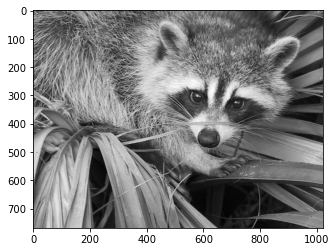

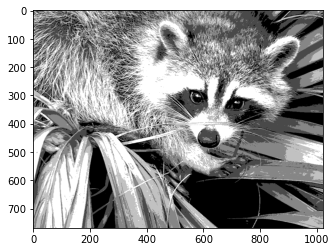

In [21]:
plt.figure(1)
plt.imshow(face , cmap=plt.cm.gray)

plt.figure(2)
plt.imshow(face_compressed , cmap=plt.cm.gray)

### ------------------------------------------------------------------------------------------------------------------------------------------------

### In this assignment have to transform iris data into 3 dimensions and plot a 3d chart with transformed dimensions and colour each data point with specific class.

In [22]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [23]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url , names=['sepal length','sepal width','petal length','petal width','target'])
data.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
x = data.iloc[: , :-1]
y = data.iloc[: , -1]

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
pcadf = pd.DataFrame(principalComponents , columns=['principal component 1', 'principal component 2', 'principal component 3'])
pcadf = pd.concat([pcadf , y] ,axis=1)
pcadf.head()

,principal component 1,principal component 2,principal component 3,target
0,-2.684207,0.326607,-0.021512,Iris-setosa
1,-2.715391,-0.169557,-0.203521,Iris-setosa
2,-2.889820,-0.137346,0.024709,Iris-setosa
3,-2.746437,-0.311124,0.037672,Iris-setosa
4,-2.728593,0.333925,0.096230,Iris-setosa


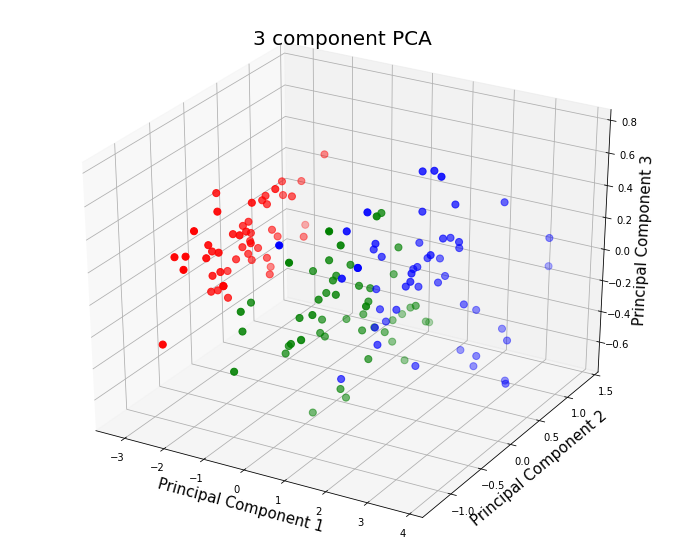

In [25]:
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r' , 'g' , 'b']

fig = plt.figure(figsize=(12,10))
plot = fig.add_subplot(111, projection='3d')

plot.set_xlabel('Principal Component 1', fontsize = 15)
plot.set_ylabel('Principal Component 2', fontsize = 15)
plot.set_zlabel('Principal Component 3', fontsize = 15)
plot.set_title('3 component PCA', fontsize = 20)

for target , color in zip(targets , colors):
    flower = data['target'] == target
    
    plot.scatter(pcadf.loc[flower , 'principal component 1'],
                 pcadf.loc[flower , 'principal component 2'],
                 pcadf.loc[flower , 'principal component 3'],
                 c = color,
                 s = 50)

### ------------------------------------------------------------------------------------------------------------------------------------------------

In [26]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# load dataset
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv'
series = read_csv(url, header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
series.head()

<ipython-input-26-656230b6fea4>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64

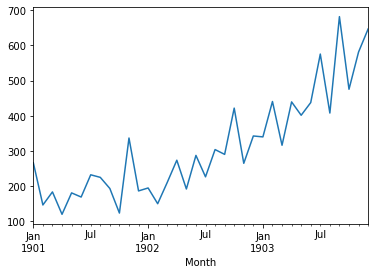

In [27]:
series.plot()

In [28]:
x = series.values

tot_size = len(x)
train_size = int(len(x)*0.66)

train , test = x[0:train_size] , x[train_size : tot_size]
print(len(train) , len(test) , tot_size)

23 13 36


predicted=343.271619, expected=342.300000
predicted=293.328866, expected=339.700000
predicted=368.668354, expected=440.400000
predicted=335.044278, expected=315.900000
predicted=363.220731, expected=439.300000
predicted=357.643760, expected=401.300000
predicted=443.046612, expected=437.400000
predicted=378.365487, expected=575.500000
predicted=459.413195, expected=407.600000
predicted=526.889344, expected=682.000000
predicted=457.231070, expected=475.300000
predicted=672.913742, expected=581.300000
predicted=531.540969, expected=646.900000
Test RMSE: 7924.783


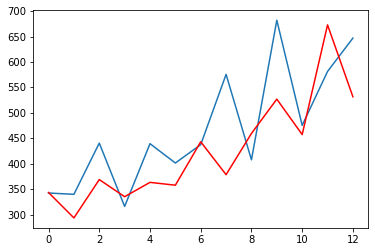

In [29]:
history = [x for x in train]

predictions = []

for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model = model.fit()
    output = model.forecast()
    
    predictions.append(output)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (output, obs))

mse = (mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % mse)

pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()